# 1. Sample Data and Boosting Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

### 1.1 Data

In [2]:
data = np.linspace(0, 6, 150)[:, np.newaxis]

label = np.sin(data).ravel() + np.sin(6 * data).ravel()
noise = np.random.normal(data.shape[0]) * 0.01
label += noise

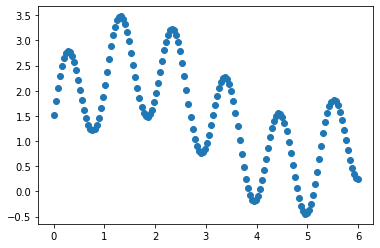

In [3]:
plt.scatter(data, label)

### 1.2 Split
시계열 데이터라고 가정후 데이터 분리

In [4]:
train_size = 125
train_data, test_data = data[:train_size], data[train_size:]
train_label, test_label = label[:train_size], label[train_size:]

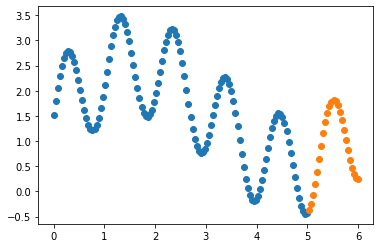

In [5]:
plt.scatter(train_data, train_label)
plt.scatter(test_data, test_label, color="C1")

# 2. Decision Tree

In [6]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=2)

### 2.1 Learning

In [7]:
tree.fit(train_data, train_label)

DecisionTreeRegressor(max_depth=2)

### 2.2 Predict

In [8]:
tree_train_pred = tree.predict(train_data)
tree_test_pred = tree.predict(test_data)

### 2.3 Evalution

In [9]:
from sklearn.metrics import mean_squared_error

tree_train_mse = mean_squared_error(train_label, tree_train_pred)
tree_test_mse = mean_squared_error(test_label, tree_test_pred)

In [10]:
print(f"Tree mean squared error is {tree_train_mse:.4f}")
print(f"Tree mean squared error is {tree_test_mse:.4f}")

Tree mean squared error is 0.3669
Tree mean squared error is 1.8188


### 2.4 Visualization

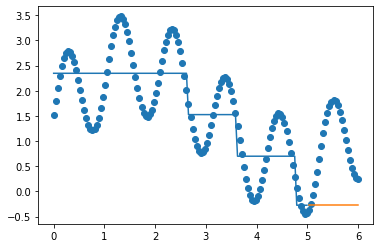

In [11]:
plt.scatter(data, label)
plt.plot(train_data, tree_train_pred)
plt.plot(test_data, tree_test_pred)

# 3. AdaBoost
AdaBoost는 `sklearn.ensemble`의 `AdaBoostRegressor`로 생성  
다른 모델들과는 다르게 `base_estimator`를 선언  
가장 간단한 if else로 데이터가 분류 될 수 있도록 depth가 1인 tree로 base estimator로 설정

In [12]:
from sklearn.ensemble import AdaBoostRegressor

ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1))

### 3.1 Learning

In [13]:
ada_boost.fit(train_data, train_label)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1))

### 3.2 Predict

In [14]:
ada_boost_train_pred = ada_boost.predict(train_data)
ada_boost_test_pred = ada_boost.predict(test_data)

### 3.3 Evalution

In [15]:
ada_boost_train_mse = mean_squared_error(train_label, ada_boost_train_pred)
ada_boost_test_mse = mean_squared_error(test_label, ada_boost_test_pred)

In [16]:
print(f"Ada Boost Train mean squared error is {ada_boost_train_mse:.4f}")
print(f"Ada Boost Test mean squared error is {ada_boost_test_mse:.4f}")

Ada Boost Train mean squared error is 0.4615
Ada Boost Test mean squared error is 0.5289


### 3.4 Visualization

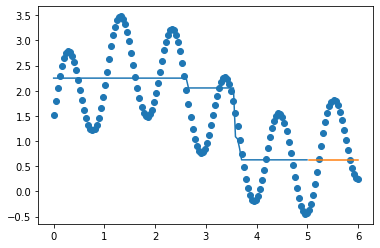

In [17]:
plt.scatter(data, label)
plt.plot(train_data, ada_boost_train_pred)
plt.plot(test_data, ada_boost_test_pred)

# 4. GradientBoost
Gradient Boost는 `sklearn.ensemble` 의 `GradientBoostingRegressor`로 생성   
Gradient Boost또한 간단한 if else로 만들 수 있도록 max_depth를 1로 설정

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost = GradientBoostingRegressor(max_depth=1)

### 4.1 Learning

In [19]:
grad_boost.fit(train_data, train_label)

GradientBoostingRegressor(max_depth=1)

### 4.2 Predict

In [20]:
grad_boost_train_pred = grad_boost.predict(train_data)
grad_boost_test_pred = grad_boost.predict(test_data)

### 4.3 Evalution

In [21]:
grad_boost_train_mse = mean_squared_error(train_label, grad_boost_train_pred)
grad_boost_test_mse = mean_squared_error(test_label, grad_boost_test_pred)

In [22]:
print(f"Gradient Boost Train mean squared error is {grad_boost_train_mse:.4f}")
print(f"Gradient Boost Test mean squared error is {grad_boost_test_mse:.4f}")

Gradient Boost Train mean squared error is 0.2767
Gradient Boost Test mean squared error is 1.3215


### 4.4 Visualization

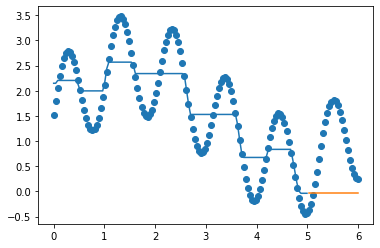

In [23]:
plt.scatter(data, label)
plt.plot(train_data, grad_boost_train_pred)
plt.plot(test_data, grad_boost_test_pred)

# 5. Total

In [24]:
print(f"Tree train mean squared error is {tree_train_mse:.4f}")
print(f"Ada Boost train mean squared error is {ada_boost_train_mse:.4f}")
print(f"Gradient Boost train mean squared error is {grad_boost_train_mse:.4f}")

Tree train mean squared error is 0.3669
Ada Boost train mean squared error is 0.4615
Gradient Boost train mean squared error is 0.2767


In [25]:
print(f"Tree test mean squared error is {tree_test_mse:.4f}")
print(f"Ada Boost test mean squared error is {ada_boost_test_mse:.4f}")
print(f"Gradient Boost test mean squared error is {grad_boost_test_mse:.4f}")

Tree test mean squared error is 1.8188
Ada Boost test mean squared error is 0.5289
Gradient Boost test mean squared error is 1.3215


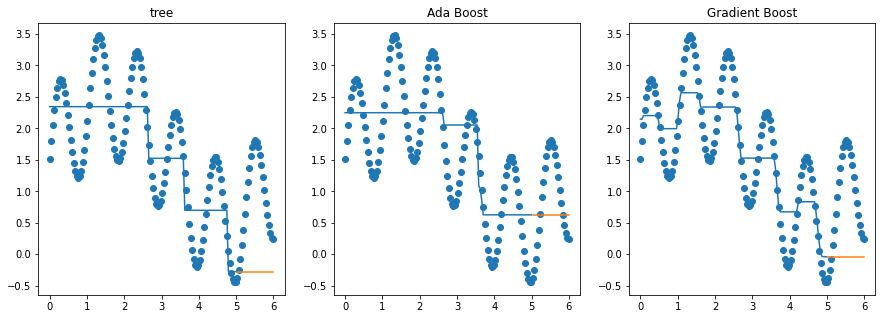

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

preds = [
    ("tree", tree_train_pred, tree_test_pred),
    ("Ada Boost", ada_boost_train_pred, ada_boost_test_pred),
    ("Gradient Boost", grad_boost_train_pred, grad_boost_test_pred)
]

for idx, (name, train_pred, test_pred) in enumerate(preds):
    ax = axes[idx]
    ax.scatter(data, label)
    ax.plot(train_data, train_pred)
    ax.plot(test_data, test_pred)
    ax.set_title(name)

# 6. Summary

> Boosting
- 악 분류기를 순차적(Sequential)으로 학습하는 앙상블 기법
- 예측을 반복하면서 잘못 예측한 데이터에 가중치 부여해서 오류 개선
- 분류가 잘못되 ㄴ데이터에 더 큰 가중을 주어 표본 추출

> Bagging
- 무작위 복원추출로 부트스트랩 샘플 추출

> Boosting 종류
1. AdaBoost(Adaptive Boosting)
2. Gradient Boost
3. XGBoost

> AdaBoost(Adaptive Boosting)
- 간단한 약 분류기(변수 하나와 if문 하나 정도의 depth)들이 상호 보완하도록 순차적 학습
- 과소적합된 학습 데이터의 가중치를 높이면서 새로 학습된 모델이 학습하기 어려운 데이터에 더 잘 적합되도록 하는 방식
>> AdaBoost 학습 방법
    1. 전체 학습 데이터를 이용해 모델 생성
    2. 잘못 예측된 데이터의 가중치를 상대적으로 높여줌
    3. 가중치 반영하여 다음 모델 학습
    4. 2~3과정 반복
>> 예측 방법
    - 각 모델의 신뢰도를 곱하여 Voting
    
> Gradient Boost
- 학습 전 단계 모델에서 잔여 오차에 대해 새로운 모델 학습
- 잔여 오차를 예측하여 발전하는 약분류기
- 현재까지 학습된 분류기의 약점은 Gradient를 통해 알려주로 이를 중점 보완 방식
>> 학습 방법
    1. 모델 학습 후 예측값 계산
    2. 잔여 오차 계산
    3. 잔여 오차를 예측하는 트리 모델 생성
    4. Learning Rate 이용해 기존 예측값 수행
    5. 2~4 반복
>> 예측 방법
    - 최초 모델의 예측값에 생성된 잔여 오차 예측 모델의 오차 예측값 더함
    
> XGBoost (eXtreme Gradient Boosting)
- Gradient Boosting 기반 모델
- 트리 만들 때 병렬 처리를 가능하게 해서 Gradient Boosting의 속도 개선
>> 특징
    1. 병렬/분산처리
        - CPU 병렬 처리 가능
        - 코어들이 각자 할당받은 변수들로 제각기 가지 쳐 나간다
    2. Split 지점 고려할 때 일부 보고 결정
        - 연속형 변수들의 Split지점 고려할 때 일부분만 보고 고려
    3. Sparsity Awareness
        - Zero 데이터를 건너 뛰며 학습
        - 범주형 변수를 dummy화 시킬 경우 학습 속도 빠르게 가능
        
> Boosting 심화모델
1. LightGBM
    - 약분류기의 학습이 수직적으로 확장하는 leaf-wise 알고리즘 사용
2. Catboost(Categoricl Boosting)
    - 범주형 변수 처리하는데 중점을 둔 모델
    - 기존 GBM 기반 모델들이 가지고 있는 범주형 변수 처리 문제 해결
>> CatBoost의 범주형 변수 다루는 방법
        - Ordered Boosting
            - 일부만 가지고 잔여 오차 계산후 모델 생성
            - 모델 생성 뒤의 데이터의 잔여 오차는 최초로 생서된 모델로 예측한 값 사용
            - Gradient가 계속 갱신되므로 과대적합 방지가능
        - Categorical Feature Combinations
            - Imformatin gain이 동일한 두 변수를 하나의 변수로 묶는 방법
            - 데이터 전처리에 있어 변수 선택 부담 줄여줌

> Tree Growth 종류
1. Level-Wise Growth
    - 뿌리 노드와 가까운 노드부터 데이터 분할 방법
    - 수평 성장으로, RF, XGB 해당
2. Leaf-Wise Growth
    - Loss 변화가 가장 큰 노드부터 데이터 분할 방법
    - 수직 성장으로 LGBM 해당

> Boosting 장점
- XGBoost : Greedy Algorithm을 사용한 자동 가지치기가 가능해 과대적합 방지
- LGBM : XGBoost보다 학습속도 빠르고 메모리 사용량 적음, 다만 1만건 이하 데이터에서 과대적합 발생 가능
- CatBoost : 범주형 데이터 많을 때 따로 전처리 안해도 되고 좋은 성능 가능

> Stacking
- Meta Modeling으로 다른 모델들의 단점 극복하고 장점 취할 수 있는 조합 방법을 찾는 방법

>> 방법
1. 학습 데이터 이용해 Sub Model 생성
    - 예측값 중복되지 않기 위해 서로 다른 모델 학습
    - 자주 사용하는 Sub Model : SVM, RF, KNN
2. Sub Model들의 예측값 데이터로 Meta Model 생성
    - 주로 Regression 모델 학습
        
>> Stacking Regression
- Sub Model들의 학습 데이터에 대한 예측값으로 Linear Regression 학습
- 예측 사용 경우 Sub Model들의 예측을 먼저 진행 후 그 값을 Meta Model로 예측

>> Stacking Classification
- 분류 경우 Sub Model의 예측값은 두개로, Class 또는 확률
- 확률 값을 이용해 Logistic Regression을 학습

>> Stacking Multi-class Classification
- Multi Class의 경우 확률 값이 (P(Y=a), P(Y=b), P(Y=c))로 표시
- 예측 값의 shape 이(N, number of classes)가 된다.
- K개의 Sub-Model이 있을 경우의 Shape : (N, K, number of classes)
    - 이값을 다음과 같이 Reshape을 한다 ((N, K*number of classes))
- Reshape 된 데이터로 Logistic Regression을 학습한다    